# **Name: Parnadip Dasgupta**

## **Task 2: "Predict the percentage of a student based on the no. of study hours."**

## **Supervised Learning with Python Scikit Learn**


In [74]:
# import the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# read the data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [76]:
#convert into numpy arrays and reshape
hrs = data["Hours"].to_numpy()
hrs = hrs.reshape(-1,1)

scr = data["Scores"].to_numpy()
scr = scr.reshape(-1,1)

Text(0, 0.5, 'Percentage Score')

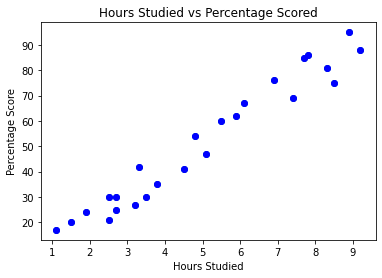

In [77]:
#plot the data 
plt.scatter(hrs,scr)
plt.scatter(hrs, scr, color='blue', marker='o')
plt.title('Hours Studied vs Percentage Scored')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 

**So, we clearly have high positive correlation between Hours Studied and Percentage of Scores.** 

<AxesSubplot:>

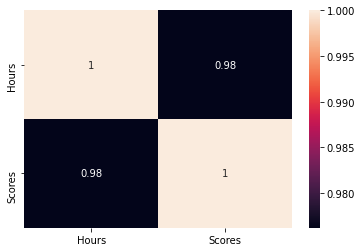

In [78]:
# taking a look at the correlation between the variables.
sns.heatmap(data.corr(), annot = True)

**Hence, we can see that the correlation between Hours Studied and Percentage of Scores is 0.98 which is very close to 1.**

**Now, we need to check for the causation between the two variables. Since, our goal is to predict Percentage of Scores, we're going to use it as the dependent variable.**

In [79]:
#devide the data into training and test set. We import train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split

hrs_tr, hrs_te, scr_tr, scr_te = train_test_split(hrs, scr, test_size = 0.2, random_state = 0 )
print(hrs_tr.shape, scr_tr.shape,hrs_te.shape,scr_te.shape)

(20, 1) (20, 1) (5, 1) (5, 1)


### **Let us first create the model using statsmodels, and see if it's valid or not.**

In [80]:
import statsmodels.api as sm
y = scr_tr
x= hrs_tr
x = sm.add_constant(x)

model1 = sm.OLS(y,x)
results = model1.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           2.79e-13
Time:                        20:59:54   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
x1             9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The p value for the x variable and F-statistic are very small. Hence, this is a valid model.**

### **We can create the same model using Scikit Learn.**

In [81]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(hrs_tr, scr_tr)

coef = model.coef_
intercept = model.intercept_

print("Training Complete.")
print(" ")
print("Coefficient : ", coef)
print("Intercept : ", intercept)

Training Complete.
 
Coefficient :  [[9.91065648]]
Intercept :  [2.01816004]


Text(0, 0.5, 'Percentage Scored')

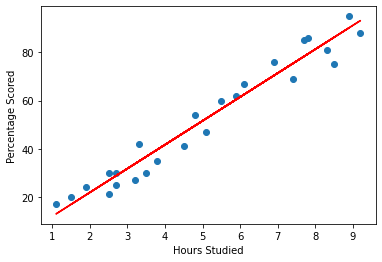

In [82]:
# plot the regression line
regression_line = intercept + coef*hrs

plt.scatter(hrs, scr)
plt.plot(hrs, regression_line, color='red')
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Scored")

In [86]:
#predict using test data set
scr_hat = model.predict(hrs_te)

print("Predicted values for the test dataset")
print(scr_hat)

Predicted values for the test dataset
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [84]:
#Actual vs Predict
df = pd.DataFrame({'Actual': scr_te[:, 0], 'Predicted': scr_hat[:, 0]})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Model Evaluation**

In [85]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
regression_results(scr_te, scr_hat)

explained_variance:  0.9483
r2:  0.9455
MAE:  4.1839
MSE:  21.5988
RMSE:  4.6474


**So, this model explains 94.55% of the variation of the test dataset.**

### **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [73]:
predicted_score = model.predict([[9.25]])
print('Score of student who studied for 9.25 hours a day is',predicted_score)

Score of student who studied for 9.25 hours a day is [[93.69173249]]
